## 00_EDA: Análisis exploratorio sobre detección de fraudes.

__Valentina Díaz Torres__

__Machine Learning__

El objetivo de esta práctica es la realización de un análisis exploratorio(EDA), de la base de datos sobre fraudes, 
con el fin de explorar cómo son estos datos, sus correlaciones y la representación de los mismos.

__1. Importación de datos y librerías__


In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
fraud= pd.read_table('./Fraud_log.csv', delimiter = ",")
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


__2.Visualización de los datos__

In [5]:
fraud.head(5)  #primeras cinco filas

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
fraud.tail() #últimas 5 filas

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [8]:
fraud.describe() #algunos estadísticos

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740055e+05,8.938049e+05,9.781600e+05,1.114193e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971725e+06,3.008246e+06,2.296779e+06,2.416554e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00,0.0


In [9]:
len(fraud)

1048575

In [10]:
fraud.shape #el dataset está formado por 1048575 filas y 11 columnas

(1048575, 11)

In [11]:
fraud.info() #estudiamos el total de columnas (11), total de filas (1048575), las filas que no 
#tineen nulos y el tipo de cada variable (float, inter...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [12]:
fraud.amount.describe()

count    1.048575e+06
mean     1.586670e+05
std      2.649409e+05
min      1.000000e-01
25%      1.214907e+04
50%      7.634333e+04
75%      2.137619e+05
max      1.000000e+07
Name: amount, dtype: float64

In [27]:
cantidadFraud =fraud.amount.sum()
cantidadFraud.mean()

166374223863.37

In [13]:
fraud.isnull().sum() #comprobamos que no hay missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
fraudes = fraud.isFraud.sum()

In [16]:
fraudes = fraud["isFraud"].value_counts()

In [17]:
fraudes  #el número total de fraudes es 1142

0    1047433
1       1142
Name: isFraud, dtype: int64

In [ ]:
tiposfraud= fraud.type.sum()
tipostraud= fraud["type"].value_counts()
tiposfraud

__3. Representación de la información__

In [14]:
corr = fraud.corr(method = "pearson")
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.025996,-0.006782,-0.007182,-0.002251,-0.019502,0.045030,NaN
amount,-0.025996,1.000000,0.004864,-0.001132,0.215562,0.311942,0.128862,NaN
oldbalanceOrg,-0.006782,0.004864,1.000000,0.999050,0.093305,0.064050,0.003829,NaN
newbalanceOrig,-0.007182,-0.001132,0.999050,1.000000,0.095179,0.063722,-0.009438,NaN
oldbalanceDest,-0.002251,0.215562,0.093305,0.095179,1.000000,0.978401,-0.007553,NaN
newbalanceDest,-0.019502,0.311942,0.064050,0.063722,0.978401,1.000000,-0.000495,NaN
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007553,-0.000495,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


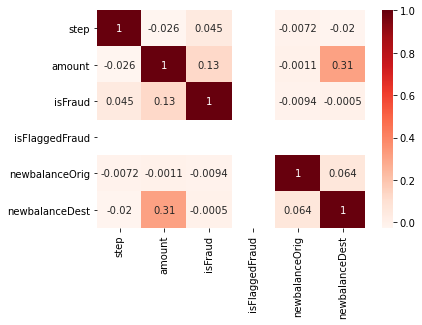

In [5]:
fraud[['step','amount','isFraud','isFlaggedFraud','newbalanceOrig','newbalanceDest']].corr()
sns.heatmap(fraud[['step','amount','isFraud','isFlaggedFraud','newbalanceOrig','newbalanceDest']].corr(), annot=True, cmap = 'Reds')
plt.show()

A priori podría decirse que las variables no están muy correlacionadas. La mayor corralación la encontramos entre 
amount y newbalanceDest y entre isFraud y amount.

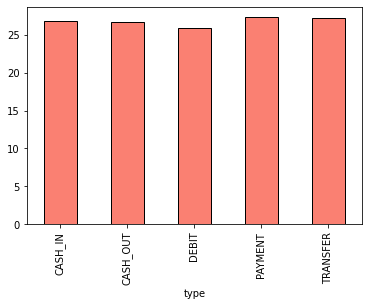

In [10]:
fraud.groupby('type')['step'].mean().plot.bar(color="salmon", edgecolor="black")
plt.show()

C:\Users\Valen\anaconda3\envs\eda_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


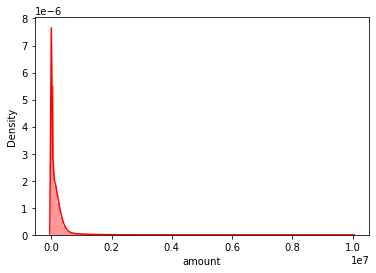

In [14]:
sns.distplot(fraud['amount'], color='red', bins=100, hist_kws={'alpha': 0.4});

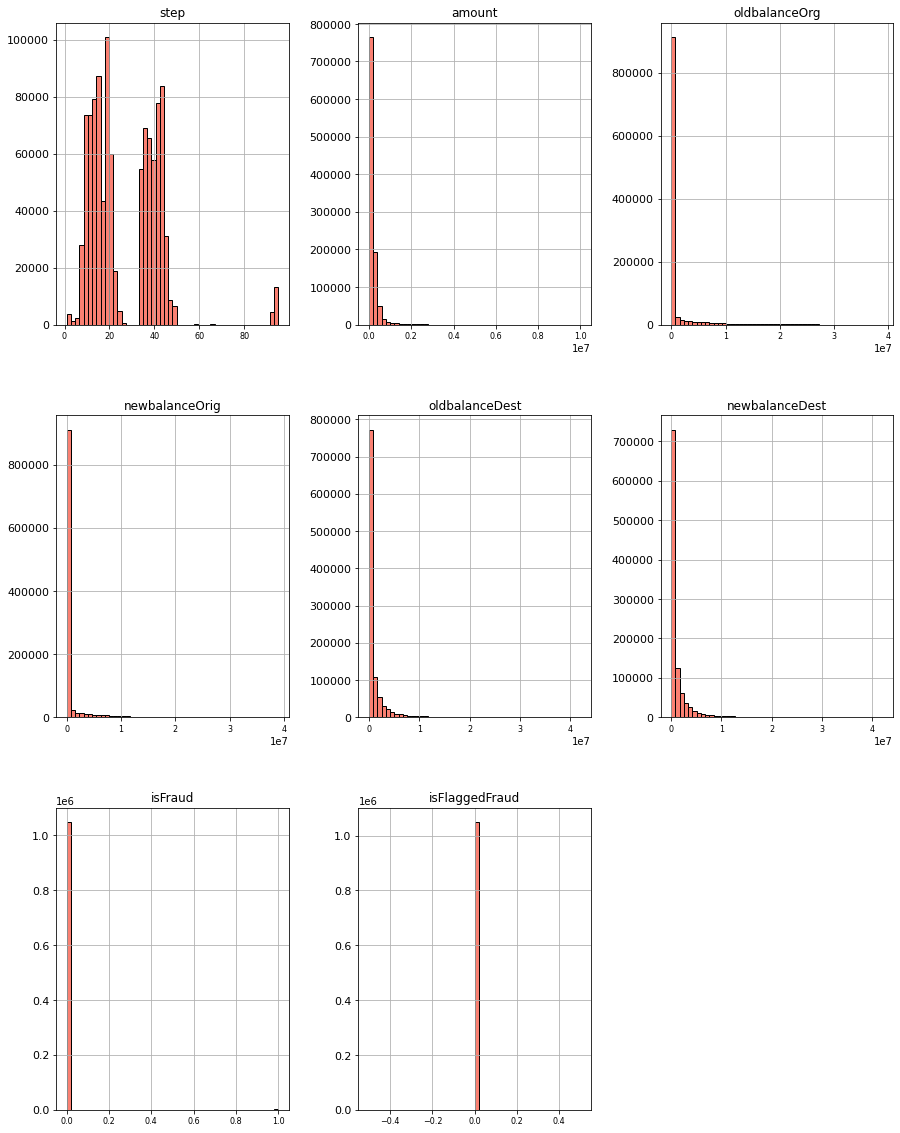

In [6]:
fraud.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=11, color = 'salmon', edgecolor = 'black');  #histograma de cada una de las ariables

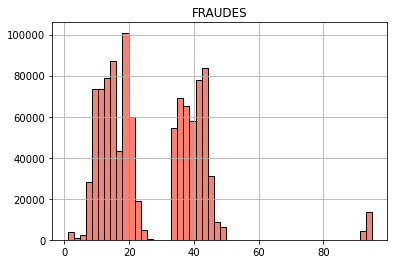

<Figure size 432x288 with 0 Axes>

In [8]:
fraude=fraud['step']
plt.title('FRAUDES')
plt.hist(fraude, bins = 50, color = "salmon", edgecolor= "black")
plt.grid(True)
plt.show()
plt.clf()



In [44]:
fraud.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [16]:
fra = fraud["type"].value_counts()

In [46]:
fra

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

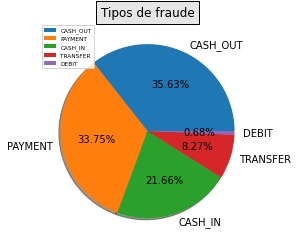

In [101]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('xx-small')
impr = ["CASH_OUT", "PAYMENT", "CASH_IN", "TRANSFER", "DEBIT"]
expl =(0, 0, 0, 0,0)
plt.title("Tipos de fraude", bbox={"facecolor":"0.9", "pad":5})
plt.pie(fra, explode=expl, labels=impr, autopct='%1.2f%%', shadow=True)
plt.legend(loc='upper left',prop=fontP)

Text(0.5, 1.0, 'Tipos de fraude')

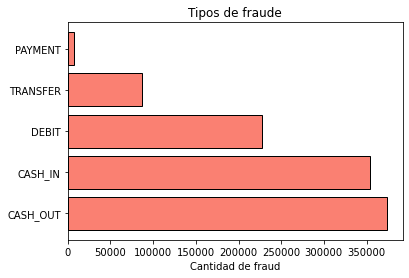

In [17]:
tipos = ("CASH_OUT", "CASH_IN", "DEBIT", "TRANSFER","PAYMENT")
posicion_y = np.arange(len(tipos))
unidades = fra
plt.barh(posicion_y, unidades, align = "center", color="salmon", edgecolor="black")
plt.yticks(posicion_y, tipos)
plt.xlabel('Cantidad de fraud')
plt.title('Tipos de fraude')

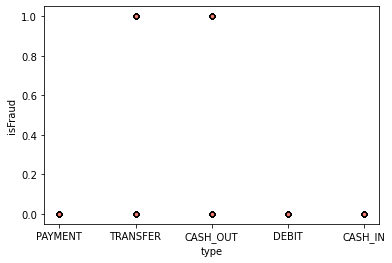

In [21]:
fraud.plot.scatter(x="type",y="isFraud", color="salmon", edgecolor="black")
plt.show()

Estos dos gráficos anteriores, muestran, en diferente formato, la proporción y cantidad de fraudes de cada uno de los tipos,
es decir, según el método utilizado para realizarlo.

In [102]:
esFraude = fraud["isFraud"].value_counts()
esFraude

0    1047433
1       1142
Name: isFraud, dtype: int64

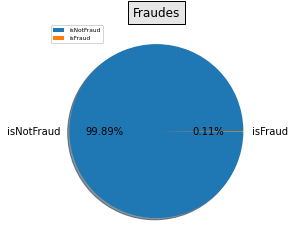

In [103]:
from matplotlib.font_manager import FontProperties    #reprsentación
fontP = FontProperties()
fontP.set_size('xx-small')
impr = ["isNotFraud", "isFraud"]
expl =(0, 0)
plt.title("Fraudes", bbox={"facecolor":"0.9", "pad":5})
plt.pie(esFraude, explode=expl, labels=impr, autopct='%1.2f%%', shadow=True)
plt.legend(loc='upper left',prop=fontP)

Con el gráfico anterior, se concluye que la cantidad de casos resultan no siendo fraude y que solo el 0.11%, frente a un 99.89 es fraude.

__4.Conclusiones__

* En conclusión, la base de datos estudiada, sobre fraudes, está compuesta de __10__ variables, que se disponen en __11__ columnas y __1.048.575__ filas.


* 3 de las variables son cualitativas y el resto cuantitativas.


* En cuanto a la correlación entre las variables, parecen no estar muy corrlacionadas entre ellas, no teniendo ninguna una fuerte correlación con otra. 


* La variable isFraud muestra que hay menos fraudes que fraudes, siendo la cantidad de no fraude de __1047433__, frente a __1142__ casos de fraude en toda la base de datos.


* En cuanto a los tipos de fraude más comunes, en primer lugar estaría el de __PAYMENT__,luego __CASH_OUT__, seguidos de __CASH_IN__, __TRANSFER__ y por último __DEBIT__.

* La media de la cantidad defraudada sería: __166,374,223,863.37__.